# Light-GBM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from collections import Counter

In [2]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")

Number of subjects in train:  21
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


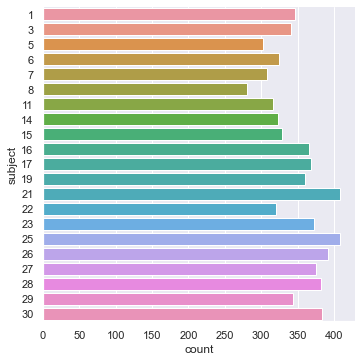

In [3]:
print("Number of subjects in train: ", len(df_train["subject"].unique()))
print(df_train["subject"].value_counts())
sb.catplot(y = "subject", data = df_train, kind = "count")
df_train.info()

Number of subjects in test:  9
24    381
18    364
20    354
13    327
12    320
4     317
2     302
10    294
9     288
Name: subject, dtype: int64


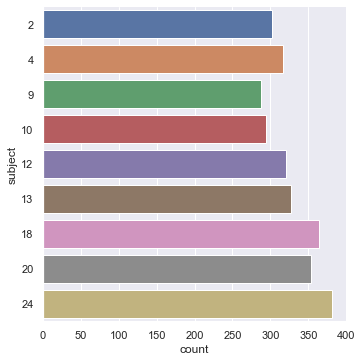

In [4]:
print("Number of subjects in test: ", len(df_test["subject"].unique()))
print(df_test["subject"].value_counts())
sb.catplot(y = "subject", data = df_test, kind = "count")

In [5]:
X_train = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y_train = df_train.Activity
X_test = pd.DataFrame(df_test.drop(['Activity','subject'], axis = 1))
y_test = df_test.Activity

In [6]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Running lgbm with hypertuning

In [16]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }   # how to choosse????????
lgbm = lgb.LGBMClassifier()
grid = RandomizedSearchCV(lgbm,param_grid ,refit=True,verbose=2)
grid.fit(X_train_scaled, y_train)
y_pred = grid.predict(X_test_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_alpha=0.5, num_leaves=31, min_data_in_leaf=30, lambda_l2=0, lambda_l1=1.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_alpha=0.5, num_leaves=31, min_data_in_leaf=30, lambda_l2=0, lambda_l1=1.5, total=   4.4s
[CV] reg_alpha=0.5, num_leaves=31, min_data_in_leaf=30, lambda_l2=0, lambda_l1=1.5 
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  reg_alpha=0.5, num_leaves=31, min_data_in_leaf=30, lambda_l2=0, lambda_l1=1.5, total=   5.0s
[CV] reg_alpha=0.5, num_leaves=31, min_data_in_leaf=30, lambda_l2=0, lambda_l1=1.5 
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[CV]  reg_alpha=0.5, num_leaves=31, min_data_in_leaf=30, lambda_l2=0, lambda_l1=1.5, total=   4.6s
[CV] reg_alpha=0.5, num_leaves=31, min_data_in_leaf=30, lambda_l2=0, lambda_l1=1.5 
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current val

[CV]  reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=0, lambda_l1=1, total=   6.1s
[CV] reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=0, lambda_l1=1 
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[CV]  reg_alpha=0.1, num_leaves=127, min_data_in_leaf=100, lambda_l2=0, lambda_l1=1, total=   6.2s
[CV] reg_alpha=0.5, num_leaves=31, min_data_in_leaf=400, lambda_l2=0, lambda_l1=1 
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: l

[CV]  reg_alpha=0.1, num_leaves=31, min_data_in_leaf=400, lambda_l2=1, lambda_l1=1, total=   5.0s
[CV] reg_alpha=0.1, num_leaves=31, min_data_in_leaf=400, lambda_l2=1, lambda_l1=1 
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[CV]  reg_alpha=0.1, num_leaves=31, min_data_in_leaf=400, lambda_l2=1, lambda_l1=1, total=   4.8s
[CV] reg_alpha=0.1, num_leaves=31, min_data_in_leaf=400, lambda_l2=1, lambda_l1=1 
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lamb

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.5min finished


In [17]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)

Model accuracy score with default hyperparameters: 0.9501

 The best estimator across ALL searched params:
 LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)


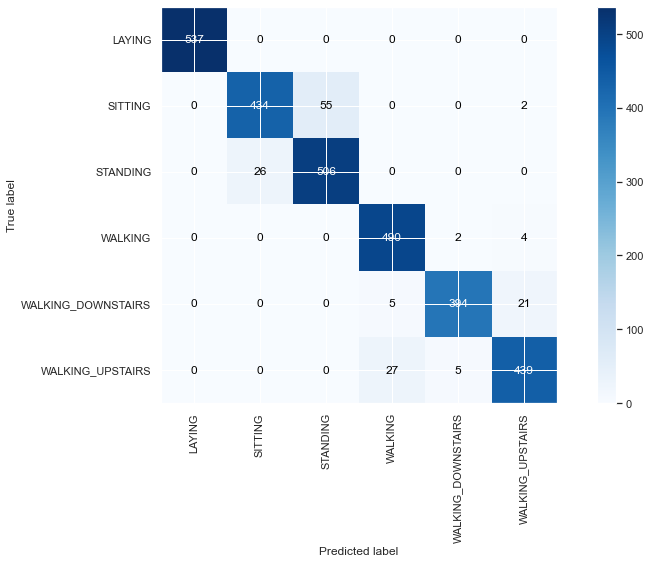

In [30]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

## Using best parameters to find important features

In [ ]:
lgbm_optimized = lgb.LGBMClassifier(lambda_l1=1, lambda_l2=0, min_data_in_leaf=400, reg_alpha=0.5)
lgbm_optimized.fit(X_train_scaled, y_train)

In [ ]:
#refer https://www.kaggle.com/code/ashishpatel26/feature-importance-of-lightgbm/notebook#Feature-importance

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm_optimized.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
feature_importances = (feature_imp / sum(feature_imp)) * 100
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [32]:
plt.savefig('lgbm_important_features.png')

<Figure size 432x288 with 0 Axes>